<a href="https://colab.research.google.com/github/Oppatunist/Machine-Learning-Experiment/blob/master/Analyzing_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program analyzes flight arrival data from major airlines.
The goal is to display data in an aesthetic & functional way to allow analysis of the best and worst airlines regarding delays.

In [0]:
import matplotlib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
#Read data and examine a sample of the first 10 rows

flights = pd.read_csv(r'\Data\formatted_flights.csv')
flights.head(11)

,datapoint,arr_delay,name
0,0,11,United Air Lines Inc.
1,1,20,United Air Lines Inc.
2,2,33,American Airlines Inc.
3,3,-18,JetBlue Airways
4,4,-25,Delta Air Lines Inc.
5,5,12,United Air Lines Inc.
6,6,19,JetBlue Airways
7,7,-14,ExpressJet Airlines Inc.
8,8,-8,JetBlue Airways
9,9,8,American Airlines Inc.


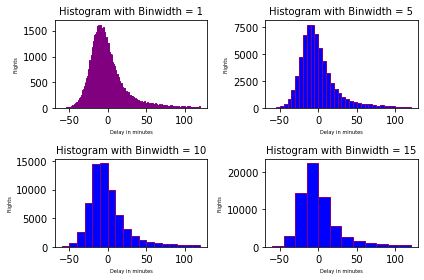

In [0]:
#Check suitable bin-widths

for i, binwidth in enumerate([1, 5, 10, 15]):
    ax = plt.subplot(2, 2, i+1)
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
           color='blue', edgecolor='purple')
    
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size=10)
    ax.set_xlabel('Delay in minutes', size=5)
    ax.set_ylabel('Flights', size=5)
    
plt.tight_layout()
plt.show()
    

Text(0, 0.5, 'Flights')

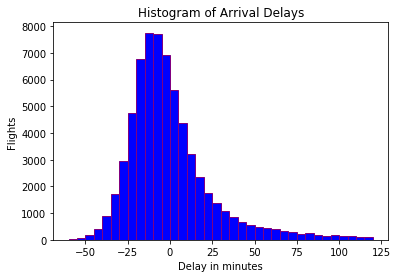

In [0]:
#Matplotlib histogram

plt.hist(flights['arr_delay'], color='blue', edgecolor='purple', bins=int(180/5))

# Add labels

plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay in minutes')
plt.ylabel('Flights')

Text(0, 0.5, 'Flights')

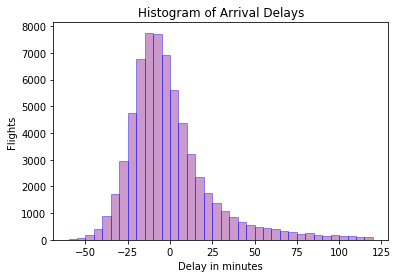

In [0]:
#Seaborn histogram

sns.distplot(flights['arr_delay'], hist=True, kde=False,
            bins=int(180/5), color='purple',
            hist_kws={'edgecolor':'blue'})
# Add labels

plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay in minutes')
plt.ylabel('Flights')

Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

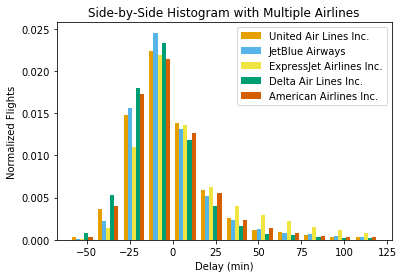

In [0]:
#Create lists of each airline

x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])


#Assign colours to each airline

colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']

names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']


#Plot the seperate list data onto a single histogram

plt.hist([x1, x2, x3, x4, x5],
         bins = int(180/15), density=True,
         color=colors, label=names)


#Formatting the histogram
         
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')
         
         

([array([7.07596254e-05, 8.74089490e-04, 3.57127992e-03, 5.39438085e-03,
         3.34512660e-03, 1.43600416e-03, 6.20187305e-04, 2.92750607e-04,
         2.09503989e-04, 1.34582033e-04, 7.90842872e-05, 7.07596254e-05]),
  array([0.00010267, 0.00136386, 0.00695664, 0.01070135, 0.00618245,
         0.00254873, 0.00113632, 0.00056053, 0.00039542, 0.00027333,
         0.00016649, 0.00013874]),
  array([0.00011516, 0.00166216, 0.0092931 , 0.01537565, 0.00907943,
         0.00389317, 0.00198127, 0.00118349, 0.00086022, 0.0005966 ,
         0.0004093 , 0.00031356]),
  array([0.00026361, 0.00268887, 0.01277003, 0.01989178, 0.01136316,
         0.0046743 , 0.00229206, 0.00132362, 0.00096289, 0.0006632 ,
         0.00045786, 0.00034686]),
  array([0.0003094 , 0.00322303, 0.01509261, 0.02277211, 0.01306556,
         0.00541519, 0.00260839, 0.00150399, 0.00106972, 0.00071731,
         0.00049809, 0.00039126])],
 array([-60., -45., -30., -15.,   0.,  15.,  30.,  45.,  60.,  75.,  90.,
        105.

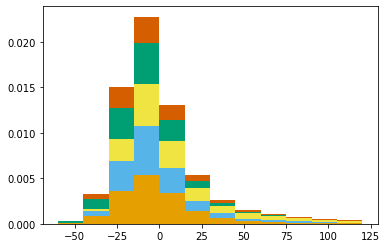

In [0]:
# Alternate display for data (Stacked Histogram) Matplotlib

plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), stacked=True,
        density=True, color=colors, label=names)

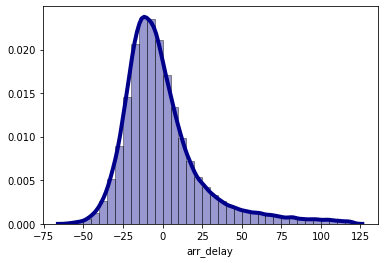

In [0]:
# Alternate display for data (Density Plots & Histogram) Seaborn

sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Text(0, 0.5, 'Density')

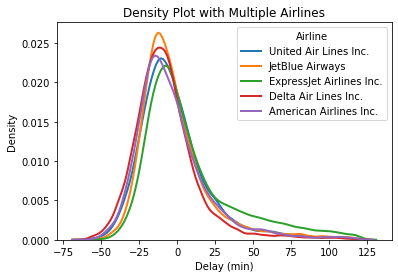

In [0]:
# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

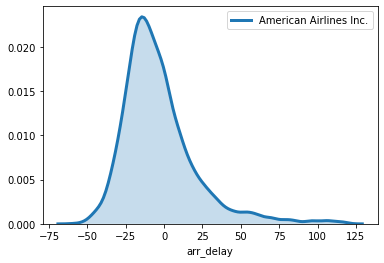

In [0]:
# Add shading to the Density Plot

sns.distplot(subset['arr_delay'], hist=False, kde=True,
            kde_kws = {'shade':True, 'linewidth':3},
            label = airline)

Text(0, 0.5, 'Density')

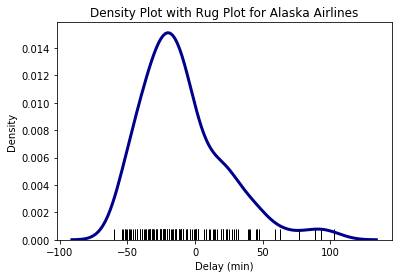

In [0]:
# Use Rug Plot to show every datapoint in a data set

subset = flights[flights['name'] == 'Alaska Airlines Inc.']

# Density Plot with Rug Plot
sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for Alaska Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')